<a href="https://colab.research.google.com/github/kexin516/Generative-AI-with-Diffusion-CLIP-BLIP-and-VQA/blob/main/Generative_AI_with_Diffusion_CLIP_BLIP_and_VQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Save in the current notebook's folder
output_folder = "./"  # or use "/content/"

# Ensure the output directory exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# # Test: save an image or file
# with open(os.path.join(output_folder, "example.txt"), "w") as f:
#     f.write("Saved right next to the notebook!")

In [ ]:
!pip install -q diffusers --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 70.9 MB/s eta 0:00:00


In [ ]:
%%capture
# !pip install -q transformers==4.36.0
# !pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip uninstall -y bitsandbytes
!pip install diffusers transformers accelerate --upgrade

In [ ]:
!pip install -q invisible_watermark safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.6 MB/s eta 0:00:00


In [ ]:
from PIL import Image
from pprint import pprint


def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
# 1. Image Generation
# Generate an image from a simple text prompt (e.g., “portrait of a dog in a chair”).
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
#prompt =
### YOUR CODE HERE
prompt = "A squirrel looking at the viewer"
### END YOUR CODE
image = pipe(prompt).images[0]
#image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

QUESTION:

1.a. What is the prompt you gave to generate the image with the single object?

"A squirrel looking at the viewer"

In [ ]:
#images.save("test.png")
filename = output_folder + "/test_single.png"
image.save(filename)

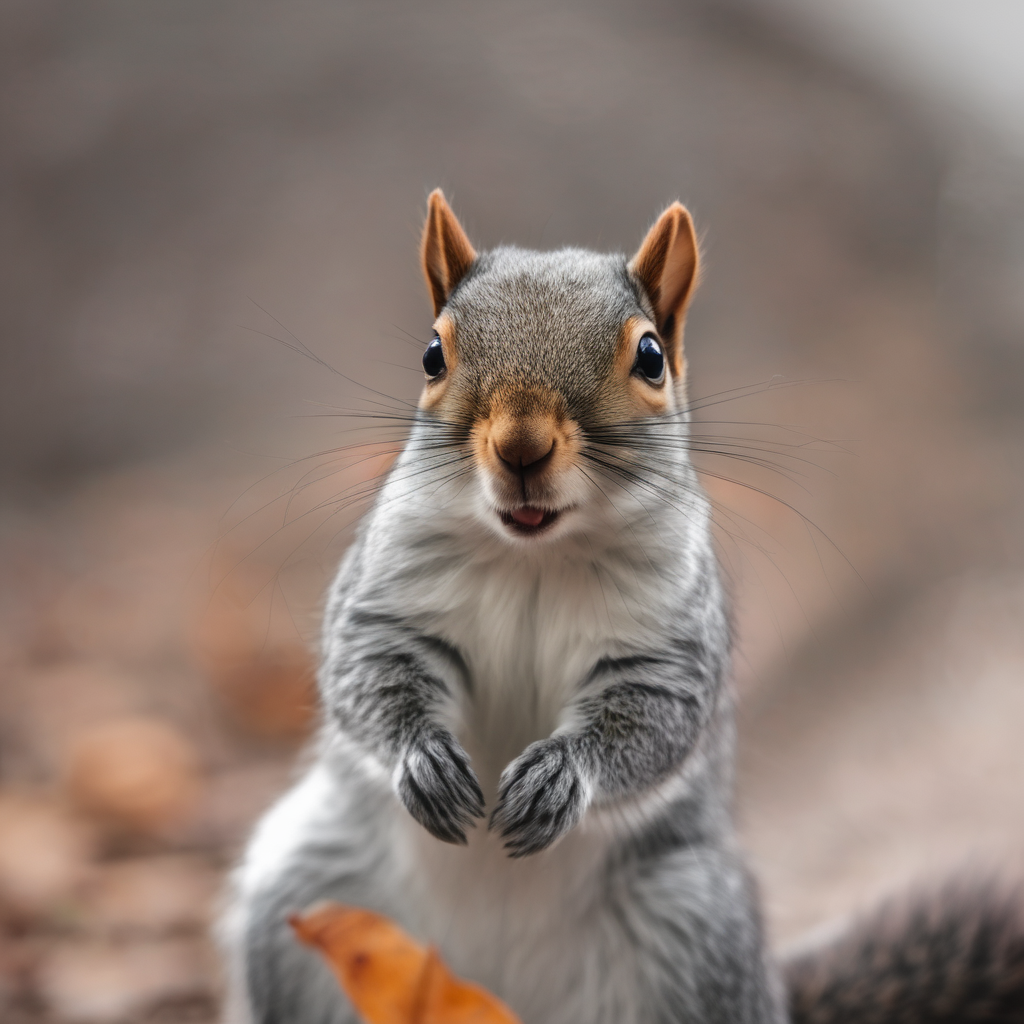

In [ ]:
image

In [ ]:
# 2. Image Classification with CLIP
# Use CLIP to evaluate your image with: One- or two-word labels, 5–10 word descriptive captions
#!pip install -q transformers
!pip install -q Pillow

In [ ]:
import io
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

In [ ]:
%%capture
cl_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
cl_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
from PIL import Image
img_url = "./test_single.png"
raw_image = Image.open(img_url, mode='r')

In [ ]:
# One- or two-word labels
### YOUR CODE HERE

captions = ["rat", "rabbit", "squirrel", "racoon"]

### END YOUR CODE

inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities


print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()
print()


                                     rat - 0.0006
                                  rabbit - 0.0001
                                squirrel - 0.9992
                                  racoon - 0.0002




QUESTION:

2.1.b. What are the 1 or 2 word labels you gave to evaluate the image?

rat, rabbit, squirrel, racoon

QUESTION:

2.1.c. What is the correct 1 or 2 word label and the score assigned to it by the CLIP model?

squirrel

In [ ]:
# 5–10 word descriptive captions
### YOUR CODE HERE

captions = ["A happy rat looking at me",
            "A squirrel eating a pinecone",
            "A happy squirrel standing still",
            "A sad squirrel looking at me"]

### END YOUR CODE

inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities


print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()
print()


               A happy rat looking at me - 0.0000
            A squirrel eating a pinecone - 0.0535
         A happy squirrel standing still - 0.8832
            A sad squirrel looking at me - 0.0632




QUESTION:

2.1.d. What are the four 5 to 10 word captions you gave to evaluate the image?

"A happy rat looking at me", "A squirrel eating a pinecone", "A happy squirrel standing still", and "A sad squirrel looking at me".

QUESTION:

2.1.e. What is the correct 5 or 10 word caption and the score assigned to it by the CLIP model?

A happy squirrel standing still

In [ ]:
# 3. Generate Complex Scene (Object Counts)
# Create a prompt that includes multiple object types (e.g., "3 cats, 2 chairs, 1 table, 1 ball").

QUESTION:

2.f. What is the prompt you gave to generate the image?

"3 deer with 2 trees in the backgound with 1 sun and 1 cloud"

In [ ]:
#Your prompt here

### YOUR CODE HERE

# prompt = "3 cats in the garden with 2 snakes in the background with a flowering tree and a rose bush"
prompt = "3 deer with 2 trees in the backgound with 1 sun and 1 cloud"

### END YOUR CODE
images = pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
filename = output_folder + "/test_counts.png"
images.save(filename)

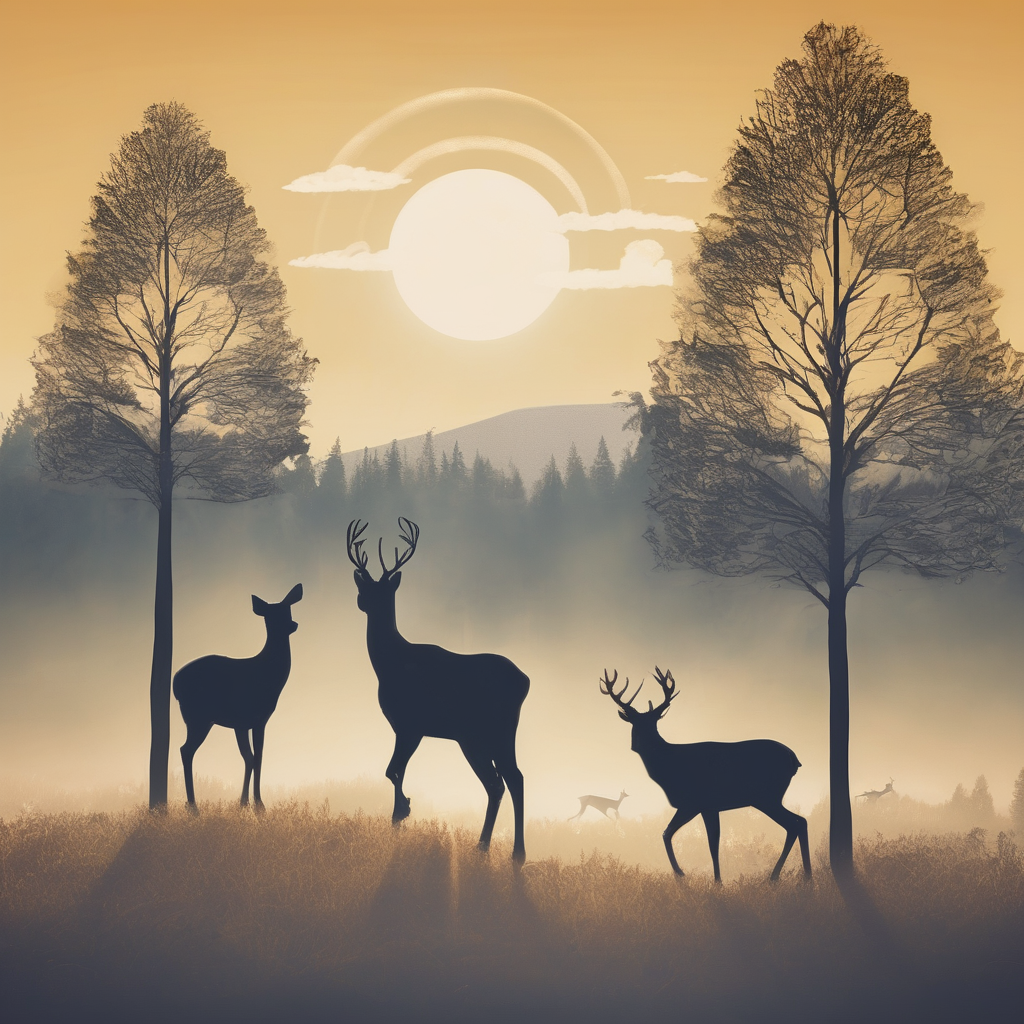

In [ ]:
images

In [ ]:
# 4. Evaluate Object Counts with CLIP
# Use CLIP again to test image alignment with object count (e.g., “Three cats”, “Five cats”).
from PIL import Image
img_url = './test_counts.png'
raw_image = Image.open(img_url, mode='r')

In [ ]:
#Your captions here
### YOUR CODE HERE

captions = ["two deer",
            "Three deer",
            "Two trees",
            "one sun"]

### END YOUR CODE

inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities

print()
print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()



                                two deer - 0.4767
                              Three deer - 0.5127
                               Two trees - 0.0106
                                 one sun - 0.0000



QUESTION:

2.1.g. What is the text of your highest scoring caption?

Three deer

QUESTION:

2.1.h. What is the score associated with the highest scoring caption

0.5127

QUESTION:

2.1.i. True or False, CLIP was able to correctly count my type 1 object.

True

In [ ]:
# 5. Generate Caption with BLIP
# Use BLIP to generate a caption from your image.
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [ ]:
bl_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
bl_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large", torch_dtype=torch.float16).to("cuda")

In [ ]:
img_url = './test_counts.png'

raw_image = Image.open(img_url, mode='r')

In [ ]:
# unconditional image captioning
inputs = bl_processor(raw_image, return_tensors="pt").to("cuda", torch.float16)

out = bl_model.generate(**inputs)
print(bl_processor.decode(out[0], skip_special_tokens=True))

three deers in a field with trees and a sun in the background


QUESTION:

3.1.j. What is the caption generated by BLIP to describe the stable diffusion image you fed to it?

three deers in a field with trees and a sun in the background

In [ ]:
# 6. Compare Captions with CLIP
# Use CLIP to compare: The BLIP-generated caption, Three of your own similar-length captions
from PIL import Image
img_url = './test_counts.png'
raw_image = Image.open(img_url, mode='r')

In [ ]:
#Your captions here
### YOUR CODE HERE
captions = ["three deers in a field with trees and a sun in the background",
            "two deer standing by trees with sun and clouds",
            "three deer on a hill with two trees and a sun",
            "three deer sitting by trees under clouds"]

### END YOUR CODE


inputs = cl_processor(
        text=captions, images=raw_image, return_tensors="pt", padding=True
)

outputs = cl_model(**inputs)
logits_per_image = outputs.logits_per_image            # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)                # we can take the softmax to get the label probabilities

print()
print()
for i, caption in enumerate(captions):
   print('%40s - %.4f' % (caption, probs[0, i]))
print()



three deers in a field with trees and a sun in the background - 0.0462
two deer standing by trees with sun and clouds - 0.4489
three deer on a hill with two trees and a sun - 0.3814
three deer sitting by trees under clouds - 0.1235



QUESTION:

3.1.k. What are the 3 captions you added for the classification with CLIP?

"two deer standing by trees with sun and clouds", "three deer on a hill with two trees and a sun", "three deer sitting by trees under clouds"

QUESTION:

3.1.l. What is the score CLIP gave to the BLIP generated caption relative to your other captions?

three deers in a field with trees and a sun in the background - 0.0462

two deer standing by trees with sun and clouds - 0.4489

three deer on a hill with two trees and a sun - 0.3814

three deer sitting by trees under clouds - 0.1235

In [ ]:
# 7. Visual Question Answering with BLIP
# Ask BLIP specific questions about your image (e.g., “How many cats?”, “How many chairs?”).
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base", torch_dtype=torch.float16).to("cuda")

QUESTION:

4.1.m. How many <type 1> objects does the VQA say are present in your generated image?

four

In [ ]:
#question = "how many <Type 1 Objects> are in the picture?"
### YOUR CODE HERE
question = "How many deer are in the picture?"

### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

four


QUESTION:

4.1.n. How many <type 2> objects does the VQA say are present in your generated image?

5

In [ ]:
### YOUR CODE HERE
question = "How many trees are in the picture?"
### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

5


QUESTION:

4.1.o. How many <type 2> objects does the VQA say are present in the background of your generated image?

6

In [ ]:
### YOUR CODE HERE
question = "How many trees are in the background of the picture??"

### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

6


QUESTION:

4.1.p. How many <type 3> objects does the VQA say are present in your generated image?

one

In [ ]:
### YOUR CODE HERE
question = "How many suns are in the picture?"

### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

one


QUESTION:

4.1.q. How many <type 4> objects does the VQA say are present in your generated image?

three

In [ ]:
### YOUR CODE HERE
question = "How many clouds are in the picture?"
### END YOUR CODE


inputs = processor(raw_image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(out[0], skip_special_tokens=True))

three
